<a href="https://colab.research.google.com/github/drfperez/openair/blob/main/Openair1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving cityNA.csv to cityNA (11).csv


<ipython-input-15-02dd8349adf5>:10: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name, parse_dates=[1], dayfirst=False, na_values=['NA'])


Pollutant names:
Index(['NOX', 'NO', 'H2S', 'CO', 'PM10', 'O3', 'NO2', 'SO2', 'HCT', 'HCNM'], dtype='object')

Pollutant values:
                       NO  H2S   CO  PM10    O3   NO2   SO2  HCT  HCNM
date                                                                  
2023-12-31 01:00:00  18.0  1.8  0.6  35.0   3.0  39.0   0.0  0.0   0.0
2023-12-31 02:00:00  10.0  1.8  0.4  27.0   6.0  35.0   0.0  0.0   0.0
2023-12-31 03:00:00   6.0  1.7  0.4  18.0   4.0  28.0   0.0  0.0   0.0
2023-12-31 04:00:00   6.0  1.7  0.4  15.0   4.0  22.0   0.0  0.0   0.0
2023-12-31 05:00:00   3.0  1.4  0.2   9.0  13.0  10.0   0.0  0.0   0.0
...                   ...  ...  ...   ...   ...   ...   ...  ...   ...
1992-04-01 20:00:00   8.0  2.2  0.0   0.0  81.0  30.0  10.0  0.7   0.5
1992-04-01 21:00:00   6.0  2.4  0.0   0.0  76.0  32.0  10.0  0.7   0.5
1992-04-01 22:00:00   6.0  2.5  0.0   0.0  88.0  19.0  10.0  0.7   0.5
1992-04-01 23:00:00   6.0  2.6  0.0   0.0  95.0  12.0  10.0  0.7   0.5
1992-04-01 00:00:00

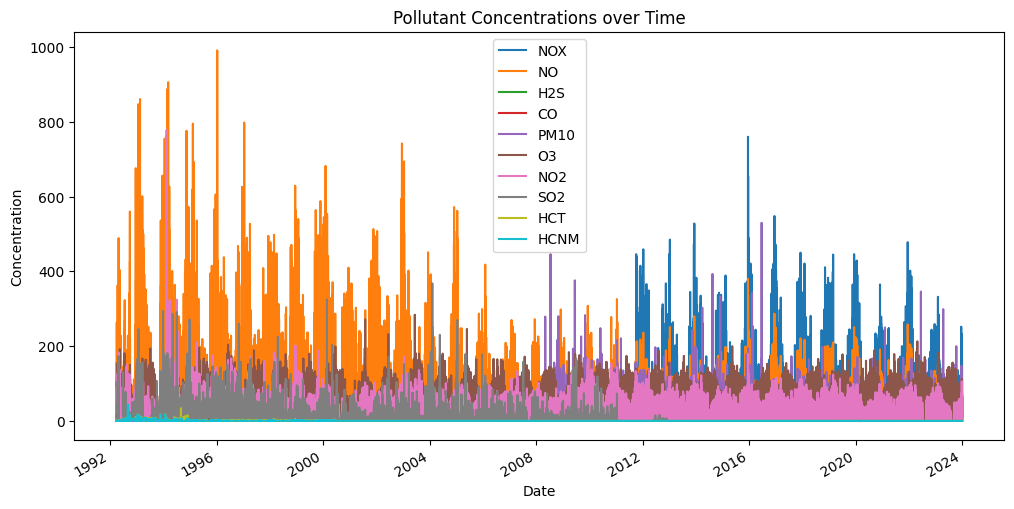

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the CSV file with hourly contaminant data
uploaded = files.upload()

# Step 2: Read the data and parse the date column with error handling for 'NA' values
file_name = next(iter(uploaded))
df = pd.read_csv(file_name, parse_dates=[1], dayfirst=False, na_values=['NA'])

# Step 3: Convert all pollutant columns to numeric and coerce errors to NaN
pollutant_names = df.columns[2:]
df[pollutant_names] = df[pollutant_names].apply(pd.to_numeric, errors='coerce')

# Optional: Handle NaN values, e.g., fill with 0
df.fillna(0, inplace=True)

# Step 4: Convert the 'date' column to DatetimeIndex and set it as the index
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.set_index('date', inplace=True)

# Step 5: Calculate annual mean, max, min, and total min
yearly_stats = df.resample('Y').agg({
    'NOX': ['mean', 'max', 'min'],
    'NO': ['mean', 'max', 'min'],
    # Add other pollutants here
})

# Step 6: Identify the ten highest values of all hours
ten_highest_hours = df.nlargest(10, pollutant_names)

# Step 7: Identify the ten highest values of daily means
daily_means = df.resample('D').mean().nlargest(10, pollutant_names)

# Step 8: Display the values
print("Pollutant names:")
print(pollutant_names)
print("\nPollutant values:")
print(df.iloc[:, 2:])
print("\nAnnual statistics:")
print(yearly_stats)
print("\nTen highest values of all hours:")
print(ten_highest_hours)
print("\nTen highest values of daily means:")
print(daily_means)

# Step 9: Display the values in a plot
df.plot(y=pollutant_names, figsize=(12, 6))
plt.title('Pollutant Concentrations over Time')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend(pollutant_names)
plt.show()

# Save daily data to a CSV file
daily_means = df.resample('D').mean()
daily_means.to_csv('daily.csv')

# Download the generated CSV files
files.download('daily.csv')

Saving cityNA.csv to cityNA (2).csv


<ipython-input-3-bf9a28298ef0>:10: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name, parse_dates=[1], dayfirst=False, na_values=['NA'])


Noms de pollutants:
Index(['NOX', 'NO', 'H2S', 'CO', 'PM10', 'O3', 'NO2', 'SO2', 'HCT', 'HCNM'], dtype='object')

Valors de pollutants:
                       NO  H2S   CO  PM10    O3   NO2   SO2  HCT  HCNM
date                                                                  
2023-12-31 01:00:00  18.0  1.8  0.6  35.0   3.0  39.0   0.0  0.0   0.0
2023-12-31 02:00:00  10.0  1.8  0.4  27.0   6.0  35.0   0.0  0.0   0.0
2023-12-31 03:00:00   6.0  1.7  0.4  18.0   4.0  28.0   0.0  0.0   0.0
2023-12-31 04:00:00   6.0  1.7  0.4  15.0   4.0  22.0   0.0  0.0   0.0
2023-12-31 05:00:00   3.0  1.4  0.2   9.0  13.0  10.0   0.0  0.0   0.0
...                   ...  ...  ...   ...   ...   ...   ...  ...   ...
1992-04-01 20:00:00   8.0  2.2  0.0   0.0  81.0  30.0  10.0  0.7   0.5
1992-04-01 21:00:00   6.0  2.4  0.0   0.0  76.0  32.0  10.0  0.7   0.5
1992-04-01 22:00:00   6.0  2.5  0.0   0.0  88.0  19.0  10.0  0.7   0.5
1992-04-01 23:00:00   6.0  2.6  0.0   0.0  95.0  12.0  10.0  0.7   0.5
1992-04-01 0

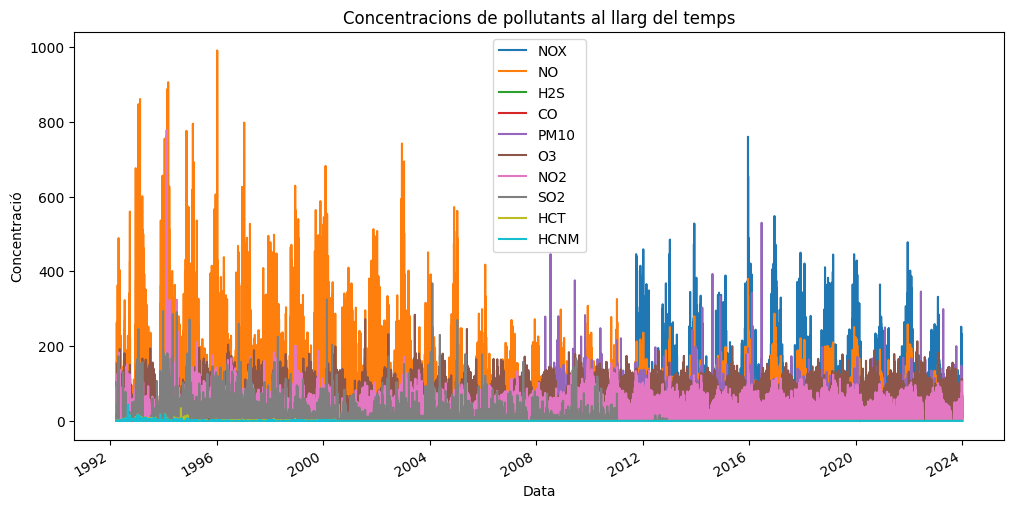

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:

from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

# Pas 1: Carregar l'arxiu CSV amb les dades horàries dels contaminants
uploaded = files.upload()

# Pas 2: Llegir les dades i parsejar la columna de dates amb maneig d'errors per 'NA' valors
file_name = next(iter(uploaded))
df = pd.read_csv(file_name, parse_dates=[1], dayfirst=False, na_values=['NA'])

# Pas 3: Convertir totes les columnes de pollutants a numèriques i coercir errors a NaN
pollutant_names = df.columns[2:]
df[pollutant_names] = df[pollutant_names].apply(pd.to_numeric, errors='coerce')

# Opcional: Manejar valors NaN, per exemple, omplir amb 0
df.fillna(0, inplace=True)

# Pas 4: Convertir la columna 'date' a DatetimeIndex i establir-la com a índex
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.set_index('date', inplace=True)

# Pas 5: Calcular la mitjana anual, màxima, mínima i mínima total
yearly_stats = df.resample('Y').agg({
    'NOX': ['mean', 'max', 'min'],
    'NO': ['mean', 'max', 'min'],
    'H2S': ['mean', 'max', 'min'],
    'CO': ['mean', 'max', 'min'],
    'PM10': ['mean', 'max', 'min'],
    'O3': ['mean', 'max', 'min'],
    'NO2': ['mean', 'max', 'min'],
    'SO2': ['mean', 'max', 'min'],
    'HCT': 'min',
    'HCNM': 'min'
})

# Pas 6: Identificar els deu valors més alts de totes les hores
ten_highest_hours = df.nlargest(10, ['NOX', 'NO', 'H2S', 'CO', 'PM10', 'O3', 'NO2', 'SO2'])

# Pas 7: Identificar els deu valors més alts de les mitjanes diàries
daily_means = df.resample('D').mean().nlargest(10, ['NOX', 'NO', 'H2S', 'CO', 'PM10', 'O3', 'NO2', 'SO2'])

# Pas 8: Presentar els valors en nombres
print("Noms de pollutants:")
print(pollutant_names)
print("\nValors de pollutants:")
print(df.iloc[:, 2:])
print("\nEstadístiques anuals:")
print(yearly_stats)
print("\nDeu valors més alts de totes les hores:")
print(ten_highest_hours)
print("\nDeu valors més alts de les mitjanes diàries:")
print(daily_means)

# Pas 9: Presentar els valors en un gràfic
df.plot(y=pollutant_names, figsize=(12, 6))
plt.title('Concentracions de pollutants al llarg del temps')
plt.xlabel('Data')
plt.ylabel('Concentració')
plt.legend(pollutant_names)
plt.show()

# Pas 10: Generar els arxius CSV
# Arxiu amb dades diàries
daily_data = df.resample('D').mean()
daily_data.to_csv('diari.csv')

# Arxiu amb dades anuals mitjanes
yearly_means = df.resample('Y').mean()
yearly_means.index = yearly_means.index.year  # Canviem l'índex a anys
yearly_means.to_csv('anual.csv')

# Descarregar els arxius CSV generats
files.download('diari.csv')
files.download('anual.csv')

Saving cityNA.csv to cityNA (9).csv


<ipython-input-10-4da2f2e10e92>:10: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name, parse_dates=[1], dayfirst=False, na_values=['NA'])


Pollutant Names:
Index(['NOX', 'NO', 'H2S', 'CO', 'PM10', 'O3', 'NO2', 'SO2', 'HCT', 'HCNM'], dtype='object')

Pollutant Values:
                       NO  H2S   CO  PM10    O3   NO2   SO2  HCT  HCNM
date                                                                  
2023-12-31 01:00:00  18.0  1.8  0.6  35.0   3.0  39.0   0.0  0.0   0.0
2023-12-31 02:00:00  10.0  1.8  0.4  27.0   6.0  35.0   0.0  0.0   0.0
2023-12-31 03:00:00   6.0  1.7  0.4  18.0   4.0  28.0   0.0  0.0   0.0
2023-12-31 04:00:00   6.0  1.7  0.4  15.0   4.0  22.0   0.0  0.0   0.0
2023-12-31 05:00:00   3.0  1.4  0.2   9.0  13.0  10.0   0.0  0.0   0.0
...                   ...  ...  ...   ...   ...   ...   ...  ...   ...
1992-04-01 20:00:00   8.0  2.2  0.0   0.0  81.0  30.0  10.0  0.7   0.5
1992-04-01 21:00:00   6.0  2.4  0.0   0.0  76.0  32.0  10.0  0.7   0.5
1992-04-01 22:00:00   6.0  2.5  0.0   0.0  88.0  19.0  10.0  0.7   0.5
1992-04-01 23:00:00   6.0  2.6  0.0   0.0  95.0  12.0  10.0  0.7   0.5
1992-04-01 00:00:00

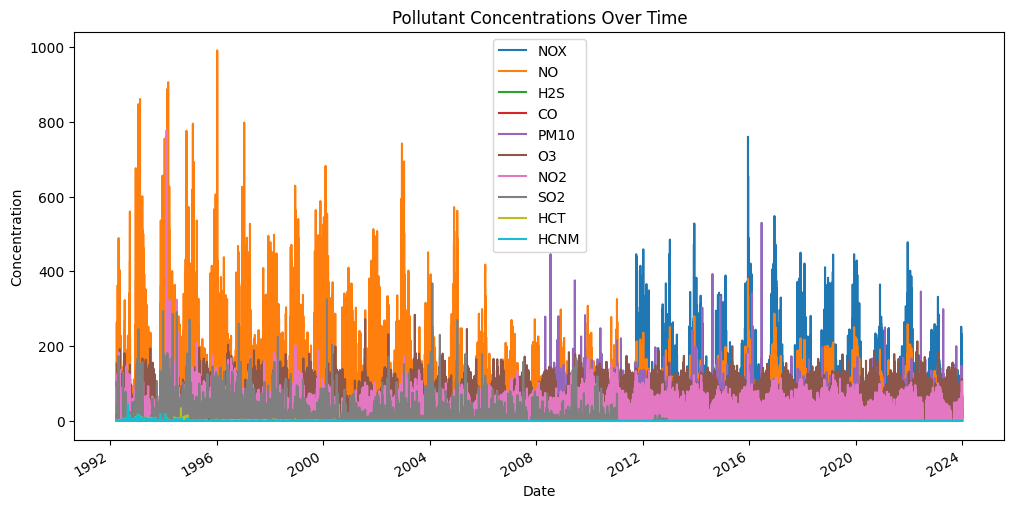

In [ ]:

from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Upload the CSV file
uploaded = files.upload()

# Step 2: Read the data and parse the date column with error handling for 'NA' values
file_name = next(iter(uploaded))
df = pd.read_csv(file_name, parse_dates=[1], dayfirst=False, na_values=['NA'])

# Step 3: Convert all pollutant columns to numeric and coerce errors to NaN
pollutant_names = df.columns[2:]
df[pollutant_names] = df[pollutant_names].apply(pd.to_numeric, errors='coerce')

# Optional: Handle NaN values, e.g., fill with 0
df.fillna(0, inplace=True)

# Corrected Step 4: Convert 'date' column to DatetimeIndex and set as index
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.set_index('date', inplace=True)

# Step 5: Calculate the yearly mean, maximum, minimum, and total minimum
yearly_stats = df.resample('Y').agg({
    'NOX': ['mean', 'max', 'min'],
    'NO': ['mean', 'max', 'min'],
    'H2S': ['mean', 'max', 'min'],
    'CO': ['mean', 'max', 'min'],
    'PM10': ['mean', 'max', 'min'],
    'O3': ['mean', 'max', 'min'],
    'NO2': ['mean', 'max', 'min'],
    'SO2': ['mean', 'max', 'min'],
    'HCT': 'min',
    'HCNM': 'min'
})

# Step 6: Identify the ten highest hour values of all times
ten_highest_hours = df.nlargest(10, ['NOX', 'NO', 'H2S', 'CO', 'PM10', 'O3', 'NO2', 'SO2'])

# Step 7: Identify the ten highest values of daily means
daily_means = df.resample('D').mean().nlargest(10, ['NOX', 'NO', 'H2S', 'CO', 'PM10', 'O3', 'NO2', 'SO2'])

# Step 8: Present the values in numbers
print("Pollutant Names:")
print(pollutant_names)
print("\nPollutant Values:")
print(df.iloc[:, 2:])
print("\nYearly statistics:")
print(yearly_stats)
print("\nTen highest hour values of all times:")
print(ten_highest_hours)
print("\nTen highest values of daily means:")
print(daily_means)

# Step 9: Present the values in a graph
df.plot(y=pollutant_names, figsize=(12, 6))
plt.title('Pollutant Concentrations Over Time')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend(pollutant_names)
plt.show()

In [ ]:

import pandas as pd
from google.colab import files

# Pas 1: Pujar el fitxer CSV a Google Colab
carregat = files.upload()

# Pas 2: Llegir les dades i parsejar la columna de dates amb els valors 'NA' tractats com a NaN
nom_fitxer = next(iter(carregat))
df = pd.read_csv(nom_fitxer, parse_dates=[1], dayfirst=False)

# Pas 3: Extreure els noms dels contaminants de la capçalera
noms_contaminants = df.columns[2:]

# Pas 4: Convertir totes les columnes de contaminants a numèriques i coercir els errors a NaN
for col in noms_contaminants:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Pas 5: Convertir la columna 'date' a DatetimeIndex i establir-la com a índex
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.set_index('date', inplace=True)

# Pas 6: Calcular els valors mitjans anuals per a cada contaminant
mitjanes_anuals = df.resample('Y').mean()

# Pas 7: Calcular els valors mitjans diaris per a cada contaminant
mitjanes_diaries = df.resample('D').mean()

# Pas 8: Calcular els valors màxims de 24 hores per a SO2 i PM10
so2_max_24h = df['SO2'].resample('D').max()
pm10_max_24h = df['PM10'].resample('D').max()

# Pas 9: Calcular els valors màxims de la mitjana de 8 hores per a CO i O3, ignorant els valors NaN
max_8h_co = df['CO'].dropna().sort_index().rolling(window='8H').mean().resample('D').max()
max_8h_o3 = df['O3'].dropna().sort_index().rolling(window='8H').mean().resample('D').max()

# Pas 10: Imprimir els resultats
print("Valors mitjans anuals:")
print(mitjanes_anuals)
print("\nValors mitjans diaris:")
print(mitjanes_diaries)
print("\nValors màxims de 24 hores per a SO2:")
print(so2_max_24h)
print("\nValors màxims de 24 hores per a PM10:")
print(pm10_max_24h)
print("\nValors màxims de la mitjana de 8 hores per a CO:")
print(max_8h_co)
print("\nValors màxims de la mitjana de 8 hores per a O3:")
print(max_8h_o3)

# Valors límits i recomanacions de la UE i de l'OMS
limits_recommendations = {
    'NO2': {'UE': 20, 'OMS': 10},
    'PM10': {'UE': 40, 'OMS': 20},
    'O3': {'UE': 120, 'OMS': 100},
    'CO': {'UE': 10, 'OMS': 4}
}

# Calcul de valors anuals mitjans
annual_means = df.resample('Y').mean()

# Calcul de valors diaris mitjans
daily_means = df.resample('D').mean()

# Calcul de valors màxims de 24 hores per SO2 i PM10
so2_max_24h = df['SO2'].rolling(window=24).max()
pm10_max_24h = df['PM10'].rolling(window=24).max()

# Calcul de valors màxims de la mitjana de 8 hores per CO i O3
max_8h_co = df['CO'].rolling(window=8).max()
max_8h_o3 = df['O3'].rolling(window=8).max()

# Valors màxims i mínims de cada contaminant per any
annual_max_min_values = df.resample('Y').agg({
    'NO2': ['max', 'min'],
    'PM10': ['max', 'min'],
    'O3': ['max', 'min'],
    'CO': ['max', 'min']
})

# Identificar valors que incompleixen la normativa de la UE i de l'OMS
exceeding_values = {}
for pollutant in limits_recommendations:
    ue_limit = limits_recommendations[pollutant]['UE']
    oms_limit = limits_recommendations[pollutant]['OMS']
    exceeding_ue = df[df[pollutant] > ue_limit]
    exceeding_oms = df[df[pollutant] > oms_limit]
    exceeding_values[pollutant] = {
        'UE': exceeding_ue,
        'OMS': exceeding_oms
    }

# Print valors mitjans anuals
print("Valors mitjans anuals:")
print(annual_means)

# Print valors mitjans diaris
print("\nValors mitjans diaris:")
print(daily_means)

# Print valors màxims de 24 hores per a SO2
print("\nValors màxims de 24 hores per a SO2:")
print(so2_max_24h)

# Print valors màxims de 24 hores per a PM10
print("\nValors màxims de 24 hores per a PM10:")
print(pm10_max_24h)

# Print valors màxims de la mitjana de 8 hores per a CO
print("\nValors màxims de la mitjana de 8 hores per a CO:")
print(max_8h_co)

# Print valors màxims de la mitjana de 8 hores per a O3
print("\nValors màxims de la mitjana de 8 hores per a O3:")
print(max_8h_o3)

# Print valors màxims i mínims de cada contaminant per any
print("\nValors màxims i mínims de cada contaminant per any:")
print(annual_max_min_values)

# Print valors que incompleixen la normativa de la UE i de l'OMS
print("\nValors que incompleixen la normativa de la UE i de l'OMS:")
for pollutant in exceeding_values:
    print(f"\n{pollutant}:")
    print(f"  Excedir limit UE: {len(exceeding_values[pollutant]['UE'])} registres")
    print(f"  Excedir limit OMS: {len(exceeding_values[pollutant]['OMS'])} registres")

Saving cityNA.csv to cityNA (6).csv


<ipython-input-9-cc2db1e8b766>:9: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(nom_fitxer, parse_dates=[1], dayfirst=False)


Valors mitjans anuals:
               Unnamed: 0        NOX         NO       H2S        CO  \
date                                                                  
1992-12-31  266683.500000        NaN  22.416695  3.752116       NaN   
1993-12-31  259748.000000        NaN  48.584550  4.383623  0.923517   
1994-12-31  251709.000000        NaN  34.171812  7.684182  0.881331   
1995-12-31  243634.000000        NaN  29.039388  3.054675  0.732122   
1996-12-31  235463.000000        NaN  24.971339  3.337046  0.481790   
1997-12-31  227316.000000        NaN  27.778996  2.252104  0.688505   
1998-12-31  219145.000000        NaN  29.428370  2.233585  0.335942   
1999-12-31  210602.000000        NaN  24.575404  1.035511  0.645143   
2000-12-31  202131.000000        NaN  23.698983  1.664329  0.499152   
2001-12-31  193708.000000        NaN  17.593039  2.162174  0.526966   
2002-12-31  185585.000000        NaN  20.005215  1.242633  0.527659   
2003-12-31  177498.000000        NaN  14.454686  1.483

In [ ]:
import pandas as pd
from google.colab import files

# Pas 1: Pujar el fitxer CSV a Google Colab
carregat = files.upload()

# Pas 2: Llegir les dades i parsejar la columna de dates amb els valors 'NA' tractats com a NaN
nom_fitxer = next(iter(carregat))
df = pd.read_csv(nom_fitxer, parse_dates=[1], dayfirst=False)

# Pas 3: Extreure els noms dels contaminants de la capçalera
noms_contaminants = df.columns[2:]

# Pas 4: Convertir totes les columnes de contaminants a numèriques i coercir els errors a NaN
for col in noms_contaminants:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Pas 5: Convertir la columna 'date' a DatetimeIndex i establir-la com a índex
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.set_index('date', inplace=True)

# Pas 6: Calcular els valors mitjans anuals per a cada contaminant
mitjanes_anuals = df.resample('Y').mean()

# Pas 7: Calcular els valors mitjans diaris per a cada contaminant
mitjanes_diaries = df.resample('D').mean()

# Pas 8: Calcular els valors màxims de 24 hores per a SO2 i PM10
so2_max_24h = df['SO2'].resample('D').max()
pm10_max_24h = df['PM10'].resample('D').max()

# Pas 9: Calcular els valors màxims de la mitjana de 8 hores per a CO i O3, ignorant els valors NaN
max_8h_co = df['CO'].dropna().sort_index().rolling(window='8H').mean().resample('D').max()
max_8h_o3 = df['O3'].dropna().sort_index().rolling(window='8H').mean().resample('D').max()

# Pas 10: Imprimir els resultats
print("Valors mitjans anuals:")
print(mitjanes_anuals)
print("\nValors mitjans diaris:")
print(mitjanes_diaries)
print("\nValors màxims de 24 hores per a SO2:")
print(so2_max_24h)
print("\nValors màxims de 24 hores per a PM10:")
print(pm10_max_24h)
print("\nValors màxims de la mitjana de 8 hores per a CO:")
print(max_8h_co)
print("\nValors màxims de la mitjana de 8 hores per a O3:")
print(max_8h_o3)
# Valors límits i recomanacions de la UE i de l'OMS
limits_recommendations = {
    'NO2': {'UE': 20, 'OMS': 10},
    'PM10': {'UE': 40, 'OMS': 20},
    'O3': {'UE': 120, 'OMS': 100},
    'CO': {'UE': 10, 'OMS': 4}
}

# Calcul de valors anuals mitjans
annual_means = df.resample('Y').mean()

# Calcul de valors diaris mitjans
daily_means = df.resample('D').mean()

# Calcul de valors màxims de 24 hores per SO2 i PM10
so2_max_24h = df['SO2'].rolling(window=24).max()
pm10_max_24h = df['PM10'].rolling(window=24).max()

# Calcul de valors màxims de la mitjana de 8 hores per CO i O3
max_8h_co = df['CO'].rolling(window=8).mean().resample('D').max()
max_8h_o3 = df['O3'].rolling(window=8).mean().resample('D').max()

# Valors màxims i mínims de cada contaminant per any
annual_max_min_values = df.resample('Y').agg({
    'NO2': ['max', 'min'],
    'PM10': ['max', 'min'],
    'O3': ['max', 'min'],
    'CO': ['max', 'min']
})

# Identificar valors que incompleixen la normativa de la UE i de l'OMS
exceeding_values = {}
for pollutant in limits_recommendations:
    ue_limit = limits_recommendations[pollutant]['UE']
    oms_limit = limits_recommendations[pollutant]['OMS']
    exceeding_ue = df[df[pollutant] > ue_limit]
    exceeding_oms = df[df[pollutant] > oms_limit]
    exceeding_values[pollutant] = {
        'UE': exceeding_ue,
        'OMS': exceeding_oms
    }

# Print valors mitjans anuals
print("Valors mitjans anuals:")
print(annual_means)

# Print valors mitjans diaris
print("\nValors mitjans diaris:")
print(daily_means)

# Print valors màxims de 24 hores per a SO2
print("\nValors màxims de 24 hores per a SO2:")
print(so2_max_24h)

# Print valors màxims de 24 hores per a PM10
print("\nValors màxims de 24 hores per a PM10:")
print(pm10_max_24h)

# Print valors màxims de la mitjana de 8 hores per a CO
print("\nValors màxims de la mitjana de 8 hores per a CO:")
print(max_8h_co)

# Print valors màxims de la mitjana de 8 hores per a O3
print("\nValors màxims de la mitjana de 8 hores per a O3:")
print(max_8h_o3)

# Print valors màxims i mínims de cada contaminant per any
print("\nValors màxims i mínims de cada contaminant per any:")
print(annual_max_min_values)

# Print valors que incompleixen la normativa de la UE i de l'OMS
print("\nValors que incompleixen la normativa de la UE i de l'OMS:")
for pollutant in exceeding_values:
    print(f"\n{pollutant}:")
    print(f"  Excedir limit UE: {len(exceeding_values[pollutant]['UE'])} registres")
    print(f"  Excedir limit OMS: {len(exceeding_values[pollutant]['OMS'])} registres")

Saving cityNA.csv to cityNA.csv


<ipython-input-3-7a4e24433770>:9: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(nom_fitxer, parse_dates=[1], dayfirst=False)


Valors mitjans anuals:
               Unnamed: 0        NOX         NO       H2S        CO  \
date                                                                  
1992-12-31  266683.500000        NaN  22.416695  3.752116       NaN   
1993-12-31  259748.000000        NaN  48.584550  4.383623  0.923517   
1994-12-31  251709.000000        NaN  34.171812  7.684182  0.881331   
1995-12-31  243634.000000        NaN  29.039388  3.054675  0.732122   
1996-12-31  235463.000000        NaN  24.971339  3.337046  0.481790   
1997-12-31  227316.000000        NaN  27.778996  2.252104  0.688505   
1998-12-31  219145.000000        NaN  29.428370  2.233585  0.335942   
1999-12-31  210602.000000        NaN  24.575404  1.035511  0.645143   
2000-12-31  202131.000000        NaN  23.698983  1.664329  0.499152   
2001-12-31  193708.000000        NaN  17.593039  2.162174  0.526966   
2002-12-31  185585.000000        NaN  20.005215  1.242633  0.527659   
2003-12-31  177498.000000        NaN  14.454686  1.483

In [ ]:

import pandas as pd
from google.colab import files

# Pas 1: Pujar el fitxer CSV a Google Colab
carregat = files.upload()

# Pas 2: Llegir les dades i parsejar la columna de dates amb els valors 'NA' tractats com a NaN
nom_fitxer = next(iter(carregat))
df = pd.read_csv(nom_fitxer, parse_dates=[1], dayfirst=False, na_values=['NA'])

# Pas 3: Extreure els noms dels contaminants de la capçalera
noms_contaminants = df.columns[2:]

# Pas 4: Convertir totes les columnes de contaminants a numèriques i coercir els errors a NaN
for col in noms_contaminants:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Pas 5: Convertir la columna 'date' a DatetimeIndex i establir-la com a índex
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.set_index('date', inplace=True)

# Pas 6: Calcular els valors mitjans anuals per a cada contaminant
mitjanes_anuals = df.resample('Y').mean()

# Pas 7: Calcular els valors mitjans diaris per a cada contaminant
mitjanes_diaries = df.resample('D').mean()

# Pas 8: Calcular els valors màxims de 24 hores per a SO2 i PM10, ignorant els valors NaN
so2_max_24h = df['SO2'].dropna().resample('D').max()
pm10_max_24h = df['PM10'].dropna().resample('D').max()

# Pas 9: Calcular els valors màxims de la mitjana de 8 hores per a CO i O3, ignorant els valors NaN
max_8h_co = df['CO'].dropna().sort_index().rolling(window='8H').mean().resample('D').max()
max_8h_o3 = df['O3'].dropna().sort_index().rolling(window='8H').mean().resample('D').max()

# Pas 10: Imprimir els resultats
print("Valors mitjans anuals:")
print(mitjanes_anuals)
print("\nValors mitjans diaris:")
print(mitjanes_diaries)
print("\nValors màxims de 24 hores per a SO2:")
print(so2_max_24h)
print("\nValors màxims de 24 hores per a PM10:")
print(pm10_max_24h)
print("\nValors màxims de la mitjana de 8 hores per a CO:")
print(max_8h_co)
print("\nValors màxims de la mitjana de 8 hores per a O3:")
print(max_8h_o3)

Saving cityNA.csv to cityNA (1).csv


<ipython-input-4-cec120db62c6>:9: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(nom_fitxer, parse_dates=[1], dayfirst=False, na_values=['NA'])


Valors mitjans anuals:
               Unnamed: 0        NOX         NO       H2S        CO  \
date                                                                  
1992-12-31  266683.500000        NaN  22.416695  3.752116       NaN   
1993-12-31  259748.000000        NaN  48.584550  4.383623  0.923517   
1994-12-31  251709.000000        NaN  34.171812  7.684182  0.881331   
1995-12-31  243634.000000        NaN  29.039388  3.054675  0.732122   
1996-12-31  235463.000000        NaN  24.971339  3.337046  0.481790   
1997-12-31  227316.000000        NaN  27.778996  2.252104  0.688505   
1998-12-31  219145.000000        NaN  29.428370  2.233585  0.335942   
1999-12-31  210602.000000        NaN  24.575404  1.035511  0.645143   
2000-12-31  202131.000000        NaN  23.698983  1.664329  0.499152   
2001-12-31  193708.000000        NaN  17.593039  2.162174  0.526966   
2002-12-31  185585.000000        NaN  20.005215  1.242633  0.527659   
2003-12-31  177498.000000        NaN  14.454686  1.483